Try to implement the functions and complete lines with "###"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']
%matplotlib inline

### Exercise 2.1

What is the distribution of the number of fair coin tosses before one observes 3 heads in a row? To solve this, consider a 4-state Markov chain with transition probability matrix
$$
    P = 
    \begin{bmatrix}
        0.5 & 0.5 & 0 & 0 \\
        0.5 & 0 & 0.5 & 0 \\
        0.5 & 0 & 0 & 0.5 \\
        0 & 0 & 0 & 1
    \end{bmatrix}
$$
where $ X_t = 1 $ if the previous toss was tails, $ X_t = 2 $ if the last two tosses were tails then heads, $ X_t = 3 $ if the last three tosses were tails then heads twice, and $ X_t = 4 $ is an absorbing state that is reached when the last three tosses are heads. 

* Write a computer program (e.g., in Python, Matlab, ...) to compute $ \Pr(T_{1,4} = m) $ for $ m = 1, 2, \ldots, 100 $ and use this to estimate expected number of tosses $ \mathbb{E}[T_{1,4}] $. 

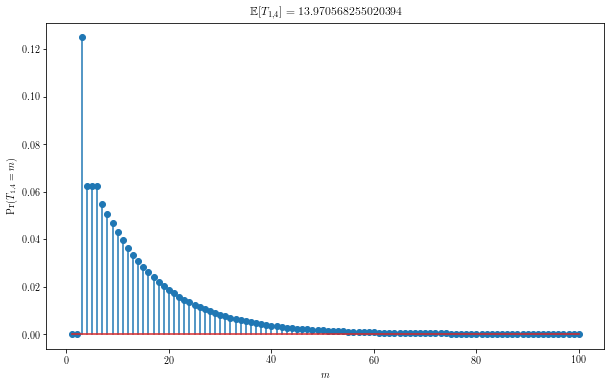

In [2]:
def compute_Phi_ET(P, ns=100):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
        ns {int} -- largest step to consider

    Returns:
        Phi_list {numpy.array} -- (ns + 1) x n x n, the Phi matrix for time 0, 1, ...,ns
        ET {numpy.array} -- n x n, expectedd hitting time approxiamated up to step ns
    '''
    # Try to compute following quantities:
    # Phi_list[m, i, j] = phi_{i,j}^{(m)} = Pr( T_{i, j} <= m )
    # ET[i, j] = E[ T_{i, j} ] ~ \sum_{m=1}^ns m Pr( T_{i, j} = m )
    # Notice in python the index starts from 0
    n=P.shape[1]
    Phi_list = np.zeros((ns+1,n,n))
    for m in range(ns+1):
        for i in range(n):
            for j in range(n):
                if m==0 :
                    Phi_list[m,i,j]=(i==j)
                else:
                    s=0
                    for k in range(n):
                        s=s+P[i,k]*Phi_list[m-1,k,j]
                    Phi_list[m,i,j]=(i==j)+(1-(i==j))*s
#Phi_list[m,i,j]=(i==j)+(1-(i==j))*(P[i,0]*Phi_list[m-1,0,j]+P[i,1]*Phi_list[m-1,1,j]+P[i,2]*Phi_list[m-1,2,j]+P[i,3]*Phi_list[m-1,3,j])
    ET = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            for m in range(ns):
                ET[i,j]=ET[i,j]+(m+1)*(Phi_list[m+1,i,j]-Phi_list[m,i,j])
    
    return Phi_list, ET
    
P = np.array([[0.5, 0.5, 0, 0], [0.5, 0, 0.5, 0], [0.5, 0, 0, 0.5], [0, 0, 0, 1]])  
Phi_list, ET = compute_Phi_ET(P, 100)

m = np.zeros(100) ### steps to be plotted
for i in range(100):
    m[i]=i+1

Pr = np.empty(100) ### \Pr(T_{1,4} = m) for all m
for i in range(100):
    Pr[i]=Phi_list[i+1,0,3]-Phi_list[i,0,3]

    
E = ET[0,3] ### \mathbb{E}[T_{1,4}]

plt.figure(figsize=(10, 6))
plt.stem(m, Pr)
plt.xlabel(r'$ m $')
plt.ylabel(r'$ \Pr(T_{1,4}=m) $')
plt.title(r'$ \mathbb{E}[T_{1,4}] = ' + str(E) + ' $');

* Write a computer program that generates 500 realizations from this Markov chain and uses them to plots a histogram of $ T_{1,4} $.

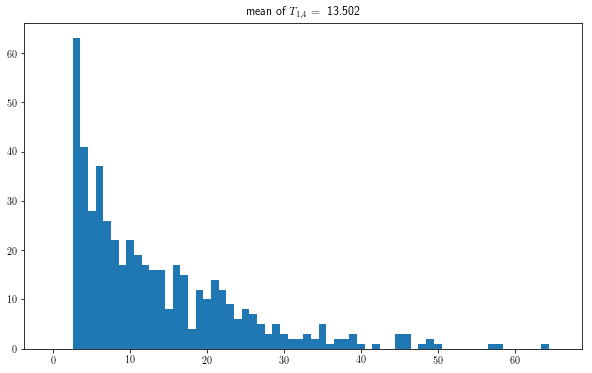

In [3]:
def simulate_hitting_time(P, states, nr):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
        states {list[int]} -- the list [start state, end state], index starts from 0
        nr {int} -- largest step to consider

    Returns:
        T {list[int]} -- a size nr list contains the hitting time of all realizations
    '''
    start, end = states
    if start == end: return [0] * nr
    # Try to simulate following quantities:
    # T[i] = hitting time of the i-th realization
    # Notice in python the index starts from 0
    
    n=P.shape[1]
    T=[]
    for i in range(nr):
        t=0
        new=start
        while 1:
            a=random.random()
            for k in range(n):
                if k==0 :
                    if a<P[new,0]:
                        new=0
                        t=t+1
                        break
                    continue
                low=0
                high=0
                for q in range(k):
                    low=low+P[new,q]
                high=low+P[new,k]
                if (a>=low) and (a<high):
                    new=k
                    t=t+1
                    break
                
            '''
            if a<P[new,0]:
                new=0
                t=t+1
            elif (P[new,0]<=a) and (a<(P[new,0]+P[new,1])):
                new=1
                t=t+1
            elif ((P[new,0]+P[new,1])<=a) and (a<(P[new,0]+P[new,1]+P[new,2])):
                new=2
                t=t+1
            elif (a>=(P[new,0]+P[new,1]+P[new,2])):
                t=t+1
                break
            '''
            if (new==end):
                break
        T.append(t)
        
    return T
        
T = simulate_hitting_time(P, [0, 3], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of $ T_{1,4} = ~ $' + str(np.mean(T)));

### Exercise 2.2

Consider the miniature chutes and ladders game shown in Figure 1. 
Assume a player starts on the space labeled 1 and plays by rolling a fair four-sided die and then moves that number of spaces. 
If a player lands on the bottom of a ladder, then they automatically climb to the top. 
If a player lands at the top of a slide, then they automatically slide to the bottom. 
This process can be modeled by a Markov chain with $ n = 16 $ states where each state is associated with a square where players can start their turn (e.g., players never start at the bottom of a ladder or the top of a slide). 
To finish the game, players must land exactly on space 20 (moves beyond this are not taken). 

* Compute the transition probability matrix $ P $ of the implied Markov chain. 

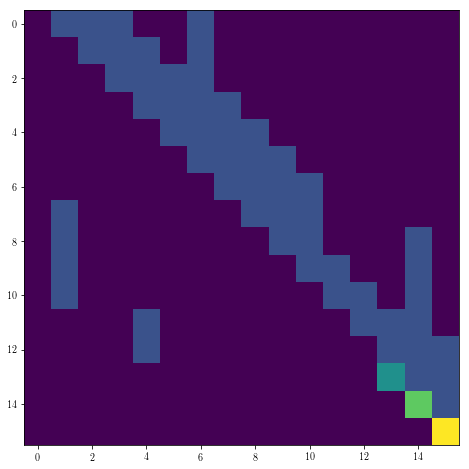

In [4]:
def construct_P_matrix(n, dice, chutes, ladders):
    '''
    Arguments:
        n {int} -- size of the state space
        dice {numpy.array} -- probability distribution of the dice outcome
        chutes {list[(int, int)]} -- the list of chutes, in pairs of (start, end)
        ladders {list[(int, int)]} -- the list of ladders, in pairs of (start, end)

    Returns:
        P {numpy.array} -- n x n, transition matrix of the Markov chain
    '''
    # Construct the transition matrix of the chutes & ladders game
    a1=len(chutes)
    a2=len(ladders)
    d=dice.shape[0]
    P=np.zeros((n+a1+a2,n+a1+a2))
    for i in range(n+a1+a2):
        for k in range(d):
            if (i+k+1)>=(n+a1+a2):
                P[i,i]=P[i,i]+dice[k]
            else:
                P[i,i+k+1]=dice[k]
            for r in range(a1):
                if ((i+k+1)==chutes[r][0]):
                    P[i,chutes[r][1]]=P[i,chutes[r][1]]+dice[k]
            for s in range(a2):
                if ((i+k+1)==ladders[s][0]):
                    P[i,ladders[s][1]]=P[i,ladders[s][1]]+dice[k]
    de_list=[]
    for r in range(a1):
        de_list.append(chutes[r][0])
    for s in range(a2):
        de_list.append(ladders[s][0])
    de_list.sort()
    for i in range(a1+a2):
        P=np.delete(P,de_list[a1+a2-1-i],axis=0)
        P=np.delete(P,de_list[a1+a2-1-i],axis=1)
    '''
    for r in range(a1):
        P=np.delete(P,chutes[r][0],axis=0)
        P=np.delete(P,chutes[r][0],axis=1)
        
    P=np.delete(P,ladders[0][0]-1,axis=0)
    P=np.delete(P,ladders[0][0]-1,axis=1)
    P=np.delete(P,ladders[1][0],axis=0)
    P=np.delete(P,ladders[1][0],axis=1)
    '''
    return P

n = 16 ###number of states
dice = np.array([0.25,0.25,0.25,0.25]) ### probability distribution of dice
chutes = [[16,5],[12,1]] ### (sorce, destination) pairs of chutes
ladders = [[13,18],[3,7]] ### (sorce, destination) pairs of ladders

P = construct_P_matrix(n, dice, chutes, ladders)
plt.figure(figsize=(8, 8))
plt.imshow(P)

* For this Markov chain, write a computer program (e.g., in Python, Matlab, ...) to compute the cumulative distribution of the number turns a player takes to finish (i.e., the probability $ \Pr(T_{1, 20} \le m) $ where $ T_{1, 20} $ is the hitting time from state 1 to state 20).


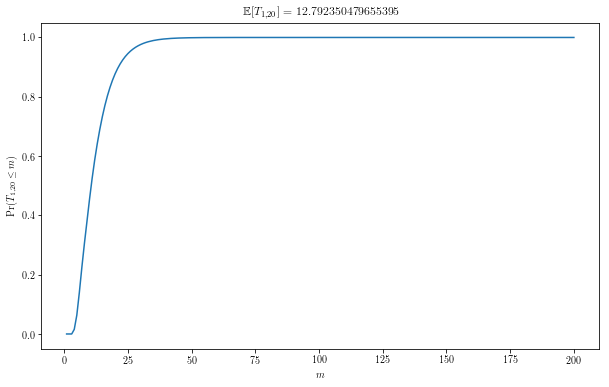

In [5]:
Phi_list, ET = compute_Phi_ET(P, ns=200)

m = np.zeros(200) ###steps to be plotted
for i in range(200):
    m[i]=i+1

Pr = np.empty(200) ### \Pr(T_{1,20} <= m) for all m
for i in range(200):
    Pr[i]=Phi_list[i+1,0,n-1]

E = ET[0,n-1] ###\mathbb{E}[T_{1,20}]

plt.figure(figsize=(10, 6))
plt.plot(m ,Pr)
plt.xlabel(r'$ m $')
plt.ylabel(r'$ \Pr(T_{1,20} \le m) $')
plt.title(r'$ \mathbb{E}[T_{1,20}] = ' + str(E) + ' $');

* Write a computer program that generates 500 realizations from this Markov chain and uses them to plot a histogram of $ T_{1, 20} $.


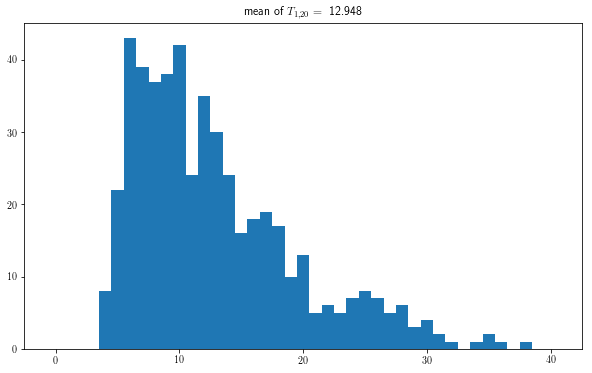

In [6]:
T = simulate_hitting_time(P, [0, n-1], 500)
plt.figure(figsize=(10, 6))
plt.hist(T, bins=np.arange(max(T))-0.5)
plt.title(r'mean of $ T_{1,20} = ~ $' + str(np.mean(T)));

* Optional Challenge: If the ﬁrst player rolls 4 and climbs the ladder to square 8, then what is the probability that the second player will win.

In [ ]:
Pr_win = 0
### compute Pr_win
Pr_win

### Exercise 2.3

In a certain city, it is said that the weather is rainy with a 90% probability if it was rainy the previous day and with a 50% probability if it not rainy the previous day. 
If we assume that only the previous day’s weather matters, then we can model the weather of this city by a Markov chain with $ n = 2 $ states whose transitions are governed by
$$
    P = 
    \begin{bmatrix}
        0.9 & 0.1 \\
        0.5 & 0.5
    \end{bmatrix}
$$
Under this model, what is the steady-state probability of rainy weather?


In [7]:
from scipy.linalg import null_space
def stationary_distribution(P):
    '''
    Arguments:
        P {numpy.array} -- n x n, transition matrix of the Markov chain

    Returns:
        pi {numpy.array} -- length n, stationary distribution of the Markov chain
    '''
    # Think pi as column vector, solve linear equations:
    #     P^T pi = pi
    #     sum(pi) = 1
    n=P.shape[0]
    pi=np.zeros(n)
    I=np.identity(n)
    IP=np.subtract(I,P)
    T=IP.transpose()
    #T=np.array([[0.1,-0.5], [-0.1,0.5]])
    #T = Matrix(T)
    ns = null_space(T)
    ns=ns * np.sign(ns[0,0])
    su=0
    for i in range(n):
        pi[i]=ns[i][0]
        su=su+pi[i]
    for i in range(n):
        pi[i]=pi[i]/su
    return pi

P = np.array([[0.9,0.1],[0.5,0.5]])
stationary_distribution(P)

array([0.83333333, 0.16666667])

### Exercise 2.4

Consider a game where the gameboard has 8 diﬀerent spaces arranged in a circle. 
During each turn, a player rolls two 4-sided dice and moves clockwise by a number of spaces equal to their sum. 
Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [8]:
P = np.array([[1/16,0,1/16,1/8,3/16,1/4,3/16,1/8],[1/8,1/16,0,1/16,1/8,3/16,1/4,3/16],[3/16,1/8,1/16,0,1/16,1/8,3/16,1/4],[1/4,3/16,1/8,1/16,0,1/16,1/8,3/16],[3/16,1/4,3/16,1/8,1/16,0,1/16,1/8],[1/8,3/16,1/4,3/16,1/8,1/16,0,1/16],[1/16,1/8,3/16,1/4,3/16,1/8,1/16,0],[0,1/16,1/8,3/16,1/4,3/16,1/8,1/16]])### construct the transition matrix

print(P)
stationary_distribution(P)

[[0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875 0.125 ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

Next, suppose that one space is special (e.g., state-1 of the Markov chain) and a player can only leave this space by rolling doubles (i.e., when both dice show the same value). Again, the player moves clockwise by a number of spaces equal to their sum. Deﬁne the transition matrix for this 8-state Markov chain and compute its stationary probability distribution.

In [9]:
P = np.array([[13/16,0,1/16,0,1/16,0,1/16,0],[1/8,1/16,0,1/16,1/8,3/16,1/4,3/16],[3/16,1/8,1/16,0,1/16,1/8,3/16,1/4],[1/4,3/16,1/8,1/16,0,1/16,1/8,3/16],[3/16,1/4,3/16,1/8,1/16,0,1/16,1/8],[1/8,3/16,1/4,3/16,1/8,1/16,0,1/16],[1/16,1/8,3/16,1/4,3/16,1/8,1/16,0],[0,1/16,1/8,3/16,1/4,3/16,1/8,1/16]]) ### construct the transition matrix
print(P)
stationary_distribution(P)

[[0.8125 0.     0.0625 0.     0.0625 0.     0.0625 0.    ]
 [0.125  0.0625 0.     0.0625 0.125  0.1875 0.25   0.1875]
 [0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875 0.25  ]
 [0.25   0.1875 0.125  0.0625 0.     0.0625 0.125  0.1875]
 [0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625 0.125 ]
 [0.125  0.1875 0.25   0.1875 0.125  0.0625 0.     0.0625]
 [0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625 0.    ]
 [0.     0.0625 0.125  0.1875 0.25   0.1875 0.125  0.0625]]


array([0.41836864, 0.08285234, 0.10176963, 0.07092795, 0.09311176,
       0.0625555 , 0.09593429, 0.07447989])